In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
dataset = pd.read_csv("Salary_Data.csv")

In [4]:
head = dataset.head() # First 5 line
print(head,"\n")
tail = dataset.tail() # Last 5 line
print(tail,"\n")
describe = dataset.describe() #summary statistics for numerical columns
print(describe,"\n")
info = dataset.info() #index, datatype and memory information
print(info,"\n")
min = dataset.min() # Returns the lowest value in each column
print(min,"\n")
median = dataset.median() # Returns the median value in each column
print(median,"\n")
max = dataset.max() # Returns the highest value in each column
print(max,"\n")

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0 

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes
None 

YearsExperience        1.1
Salary             37731.0
dtype: float64 

Y

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracies = cross_val_score(regressor, X = X_train, y = y_train, cv = 10)
score = -1
print("Mean: %",score*accuracies.mean()*100)
print("std: %",accuracies.std()*100)

Mean: % 259.74571918775956
std: % 646.7539113998671


In [9]:
y_predict = regressor.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
#mean absolute error
mae = metrics.mean_absolute_error(y_test,y_predict)
print("mae: ",mae)
#mean squared error
mse = metrics.mean_squared_error(y_test, y_predict)
print("mse: ",mse)
#root mean square error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print("rmse: ",rmse)

mae:  3426.4269374307123
mse:  21026037.329511296
rmse:  4585.4157204675885


In [12]:
print("coef: ",regressor.coef_)

coef:  [9345.94244312]


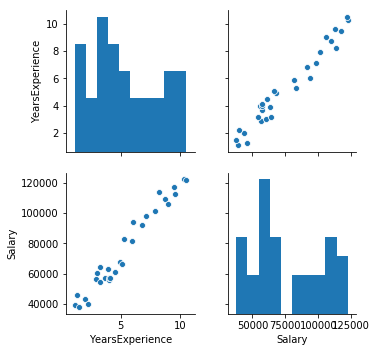

In [13]:
sns.pairplot(dataset)

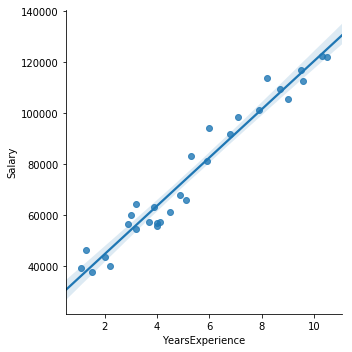

In [14]:
sns.lmplot(x='YearsExperience',y='Salary',data=dataset)

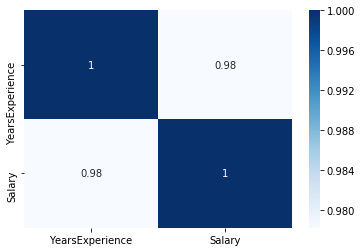

In [15]:
sns.heatmap(dataset.corr(),cmap = 'Blues', annot=True)

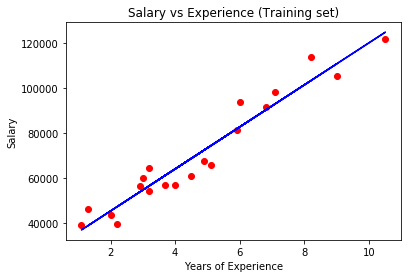

In [16]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

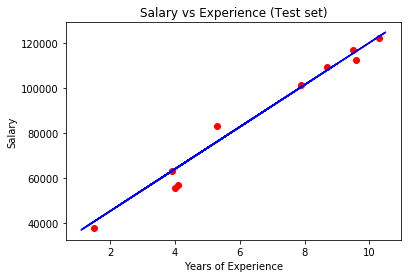

In [17]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()